# Test the Cross-correlation on SNOM images

## Load two images

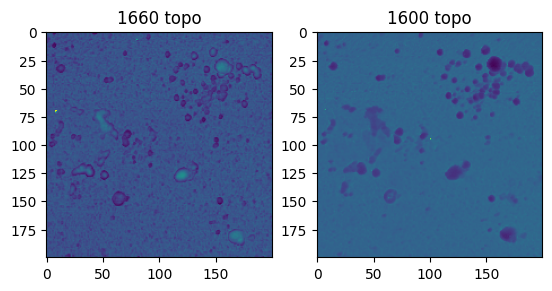

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import NeaImager as neaim

# File path
current_folder = os.getcwd()
measpath1660 = os.path.join(current_folder,'2022-04-09 125026 PH PLT-EV-niceplace_spectrum_1660_cm-1.gwy')
measpath1600 = os.path.join(current_folder,'2022-04-09 231338 PH PLT-EV-niceplace_spectrum_1130_cm-1.gwy')

# Create NeaImage object and load data
channelname = 'O3P raw'
m1660phase = neaim.NeaImage()
m1660topo = neaim.NeaImage()
m1660phase.read_from_gwyfile(measpath1660,channelname)
m1660topo.read_from_gwyfile(measpath1660,"Z raw")
m1600phase = neaim.NeaImage()
m1600topo = neaim.NeaImage()
m1600phase.read_from_gwyfile(measpath1600,channelname)
m1600topo.read_from_gwyfile(measpath1600,"Z raw")

xdegree = 2
ydegree = 2

m1660topo, bg = neaim.BackgroundPolyFit(inputobj = m1660topo, xorder=xdegree, yorder=ydegree)
m1600topo, bg = neaim.BackgroundPolyFit(inputobj = m1600topo, xorder=xdegree, yorder=ydegree)
mtype = 'median' # 'difference' or 'median'
m1660topo = neaim.LineLevel(inputobj = m1660topo, mtype = mtype)
m1600topo = neaim.LineLevel(inputobj = m1600topo, mtype = mtype)

# Correct phase images
m1600phase = neaim.LineLevel(inputobj = m1600phase, mtype = 'median')
m1660phase = neaim.LineLevel(inputobj = m1660phase, mtype = 'median')

fig, (ax1, ax2) = plt.subplots(1, 2)
# 1660 image
ax1.imshow(m1660phase.data)
ax1.set_title('1660 topo')
# 1600 image
ax2.imshow(m1600phase.data)
ax2.set_title('1600 topo')
plt.show()

198 201
200 200
-2.0 0.0


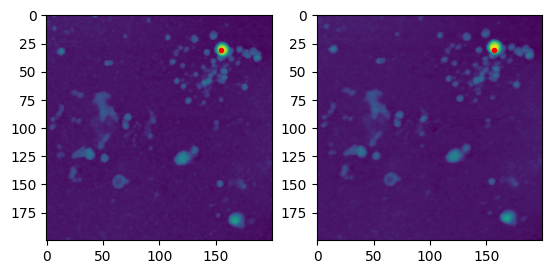

In [8]:
import numpy as np
from scipy import signal
# corr = signal.correlate2d(m1660topo.data, m1600topo.data, boundary='symm', mode='same')
corr = signal.correlate(m1660topo.data, m1600topo.data, mode='full', method='fft')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
print(x,y)
print(m1600topo.xres,m1660topo.yres)

# yshift = round((2*y-m1660topo.yres)/2)+1
# xshift = round((2*x-m1660topo.xres)/2)-1
yshift = np.round((y-m1660topo.yres)/2)+1
xshift = np.round((x-m1660topo.xres)/2)-1
print(xshift,yshift)

pointx = 155
pointy = 31
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(m1660topo.data)
ax1.plot(pointx, pointy, 'r.')
ax2.imshow(m1600topo.data)
ax2.plot(pointx-xshift, pointy-yshift, 'r.')